In [1]:
# Import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [3]:
df = pd.read_csv('creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### At first sight there are no null values, but let's double check just in case:

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Now we perform a basic statistical analysis of the dataset. As we can see, all the columns are numerical with different ranges for their values

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation map')

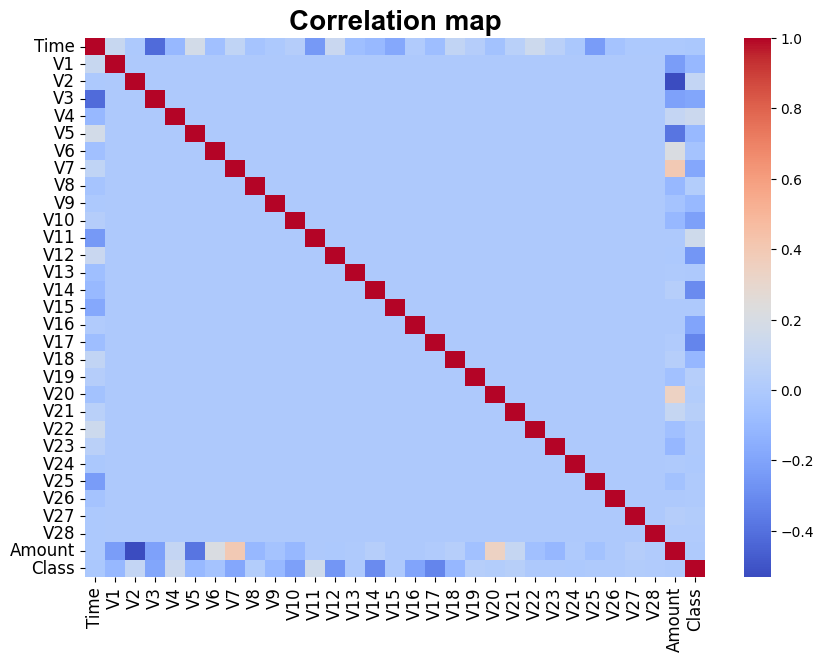

In [9]:
corr = df.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = False, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

#### From this correlation map we can see that there are some highly negatively correlated columns with Class, such as V14 or V17

## Train/test and data imbalance

In [12]:
class_data = df['Class'].value_counts() # Naming the different diseases and counting how many times they appear in the column

dis_data = pd.DataFrame({'Class': class_data.index,
                         'Counts': class_data.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(dis_data) 

   Class  Counts
0      0  284315
1      1     492


Text(0.5, 0, 'Counts')

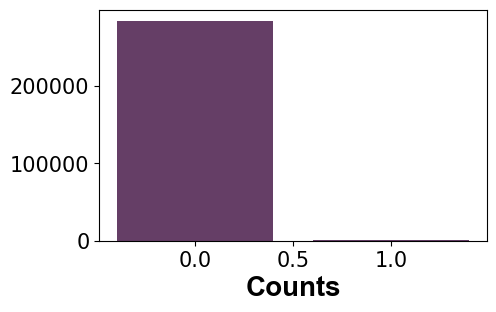

In [13]:
# Plotting the values in a bar plot for clearer understanding
plt.figure(figsize=(5,3))
plt.bar(dis_data['Class'], dis_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Class/ASD', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Counts', fontsize = 20, fontweight='bold', **csfont)

#### We can see that the data is extremely unbalanced, so we need to address this issue in order to improve the fraud detection.

In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [16]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state = 19)
X_train, y_train = ROS.fit_resample(X_train, y_train)

#### Now we can confirm that the training data is balanced

In [18]:
target = pd.Series(y_train).value_counts() # Naming the different diseases and counting how many times they appear in the column

dis_data = pd.DataFrame({'Class/ASD': target.index,
                         'Counts': target.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(dis_data) 

   Class/ASD  Counts
0          0  227453
1          1  227453


Text(0.5, 0, 'Counts')

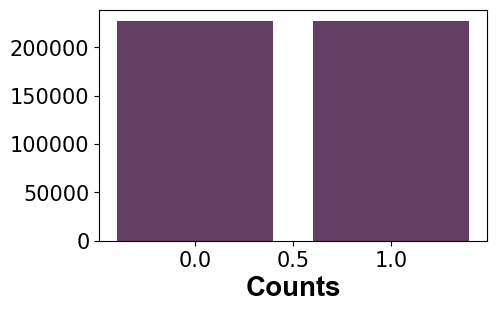

In [19]:
plt.figure(figsize=(5,3))
plt.bar(dis_data['Class/ASD'], dis_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Class/ASD', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Counts', fontsize = 20, fontweight='bold', **csfont)

## Model training

#### We can try to apply different classification algorithms such as Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Naive Bayes, Decision Tree, Random Forest or XGBoost and an articifial neural network

## Logistic Regresion

In [22]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

LogisticRegression()

Accuracy Score (Logistic Regression model): 97.7581545591798 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

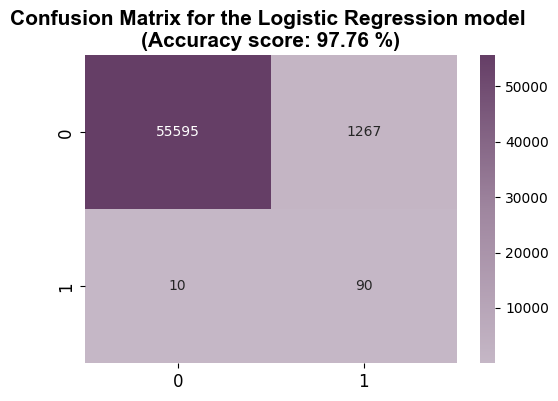

In [23]:
lr_ypred = classifier_lr.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy Score (Logistic Regression model):", accuracy_score(y_test, lr_ypred)*100, "%") # Print the accuracy score for the predictions

cm_lr = confusion_matrix(y_test, lr_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Logistic Regression model \n(Accuracy score: {accuracy_score(y_test, lr_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## XGBoost

In [25]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score (XGBoost model): 99.96488887328394 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

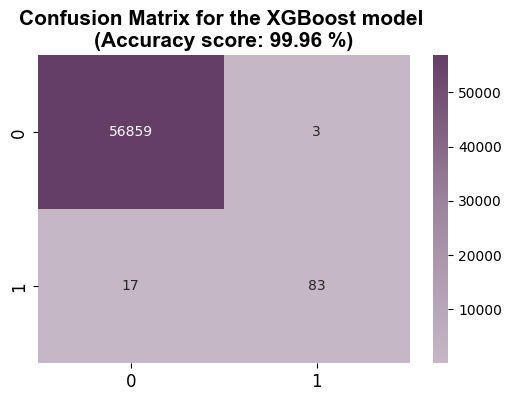

In [26]:
xg_ypred = classifier_xg.predict(X_test)

print("Accuracy Score (XGBoost model):", accuracy_score(y_test, xg_ypred)*100, "%") # Print the accuracy score for the predictions

cm_xg = confusion_matrix(y_test, xg_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xg, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the XGBoost model \n(Accuracy score: {accuracy_score(y_test, xg_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout